<a href="https://colab.research.google.com/github/progh2/python40projects/blob/main/2022_%ED%8C%8C%EC%9D%B4%EC%8D%AC40%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%B1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00.소개
![책표지](https://bookthumb-phinf.pstatic.net/cover/219/828/21982844.jpg?type=m140&udate=20220221)

* [(만들면서 배우는) 파이썬과 40개의 작품들 ](https://book.naver.com/bookdb/book_detail.naver?bid=21982844)
소스 실습 모음입니다. 
* 2022년도 컴퓨터과학 교양서 한 달 한 권 책 읽기 모임 4월~5월 읽기 도서입니다.
* 아래 코드에는 책 내용의 코드를 코랩에서 동작할 수 있도록 수정된 부분이 있습니다.
* Colab 주소: https://colab.research.google.com/drive/1puAcdT3xjzBEtxE3g3H1D3TAy0yUP97R?usp=sharing
* Github 주소: https://github.com/progh2/python40projects

# 01.숫자 맞추기 게임 만들기

In [ ]:
import random


random_number = random.randint(1, 100)
# print(random_number)

game_count = 1

while True:
  try:
    my_number = int(input("1~100 사이의 숫자를 입력하세요: "))
    if my_number > random_number:
      print("다운")
    elif my_number < random_number:
      print("업")
    elif my_number == random_number:
      print(f"축하합니다. {game_count}회 만에 맞추었습니다.")
      break
    
    game_count = game_count + 1
  except:
    print("에러가 발생했습니다. 숫자만 입력하세요")


1~100 사이의 숫자를 입력하세요: 1
업
1~100 사이의 숫자를 입력하세요: 50
다운
1~100 사이의 숫자를 입력하세요: 25
다운
1~100 사이의 숫자를 입력하세요: 15
업
1~100 사이의 숫자를 입력하세요: 19
업
1~100 사이의 숫자를 입력하세요: 20
축하합니다. 6회 만에 맞추었습니다.


# 02.컴퓨터 외부 및 내부 IP 확인하기

## 내부, 외부 IP 한 번에 출력하는 코드(p.85)

In [ ]:
# main2-4.py
import socket
import requests
import re


in_addr = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
in_addr.connect(("www.google.co.kr", 443))
print("내부 IP: ", in_addr.getsockname()[0])

# 책의 original code. 하지만 코랩에서는 ipconfig.kr이 동작하지 않는다.
#req = requests.get("http://ipconfig.kr/")  
# 에러가 한글이 깨져서 나오는데 이를 출력하기위한 코드
#req.raise_for_status()
#req.encoding="EUC-KR"
#print(req.text)
#out_addr = re.search(r'IP Address : (\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})', req.text)[1]

# 코랩에서도 외부 아이피를 알기 위한 변경된 코드
req = requests.get("https://www.myip.com/")   
# <span id="ip">34.73.104.121</span> 와 같은 식으로 나타내기 때문에 이를 추출하도록 패턴 변경
out_addr = re.search(r'<span id="ip">(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})</span>', req.text)[1]
print("외부 IP: ", out_addr)


내부 IP:  172.28.0.2
외부 IP:  34.73.104.121


# 03.텍스트를 음성으로 변환하기

## 사전 필요 라이브러리 설치
* gtts : 문자를 음성으로 변환해주는 라이브러리
* playsound : 사운드 재생 라이브러리. (하지만 코랩에서는 동작하지 않는다!!)


In [1]:
!pip install gtts
!pip install playsound

## 코랩에서 사운드 재생하기
코랩에서는 playsound가 동작하지 않는다.
대신 Audio 라이브러리를 사용해서 재생할 수 있도록 가능하다. 
- 참고 링크1 : https://jimmy-ai.tistory.com/25 
- 참고 링크2 : https://colab.research.google.com/drive/1--xY78_ZTFwpI7F2ZfaeyFKiAOG2nkwd#scrollTo=mJr7MDls3RIe

## gTTS로 글자 재생하기

In [4]:
# main3-1.py
from gtts import gTTS
from IPython.display import Audio 

text = "안녕하세요. 파이썬과 40개의 작품들입니다."
tts = gTTS(text=text, lang='ko')
tts.save(r"hi.mp3")
display(Audio('hi.mp3', autoplay=True))

## 텍스트를 음성으로 변환, 재생하기

In [18]:
# main3-3.py
from gtts import gTTS
from IPython.display import Audio 

!rm 나의텍스트.txt 2> /dev/null
!wget "https://gist.githubusercontent.com/progh2/74bbc3670ce5221d88049551ec4ce2a2/raw/2b567a9f2e9f3233b45b0819703c657ced01aa0f/%25EB%2582%2598%25EC%259D%2598%25ED%2585%258D%25EC%258A%25A4%25ED%258A%25B8.txt" -c "나의텍스트.txt"
file_path = r'나의텍스트.txt'
with open(file_path, 'rt', encoding='UTF8') as f:
  read_file = f.read()
tts = gTTS(text=read_file, lang='ko')
tts.save(r"나의텍스트.mp3")
display(Audio('나의텍스트.mp3', autoplay=True))

rm: cannot remove 'file_path': No such file or directory
--2022-04-27 04:06:55--  https://gist.githubusercontent.com/progh2/74bbc3670ce5221d88049551ec4ce2a2/raw/2b567a9f2e9f3233b45b0819703c657ced01aa0f/%25EB%2582%2598%25EC%259D%2598%25ED%2585%258D%25EC%258A%25A4%25ED%258A%25B8.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97 [text/plain]
Saving to: ‘나의텍스트.txt’

나의텍스트.txt      100%[===================>]      97  --.-KB/s    in 0s      

2022-04-27 04:06:55 (5.25 MB/s) - ‘나의텍스트.txt’ saved [97/97]

--2022-04-27 04:06:55--  http://file_path/
Resolving file_path (file_path)... failed: Name or service not known.
wget: unable to resolve host address ‘file_path’
FINISHED --2022-04-27 04:06:55--
Total wall clock time: 0.2s
Downloaded: 1 files, 97 in 0s (5.2

# 04.QR코드 생성기
- https://pypi.org/project/qrcode/

## QR코드 라이브러리 설치

In [12]:
!pip install qrcode

     |████████████████████████████████| 43 kB 929 kB/s 
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=a7866fb87ecd3ed4dfffe574aef374577a5702c5f8b7cb723af67c9bdfc9daff
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built qrcode


## url 기반 QR코드 생성 및 실행

In [13]:
import qrcode

qr_data="www.naver.com"
qr_img = qrcode.make(qr_data)
save_path = qr_data + ".png"
qr_img.save(save_path)

## 만들어진 이미지 출력

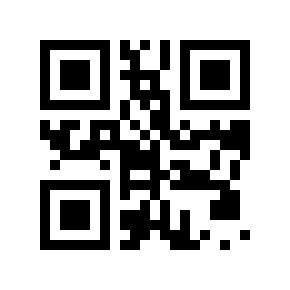

In [16]:
from IPython.display import Image
Image(save_path)

## 여러 개의 QR코드를 한번에 생성

In [50]:
# main4-2.py
from IPython.display import Image

file_path=r"qr코드모음.txt"
!rm qr코드모음.txt 2> /dev/null
!wget "https://gist.githubusercontent.com/progh2/4a4465b441786dc4d797d7e2ae33696e/raw/c23db9c4263e3d6e085677846d71ddcb6664f0d2/qr%25EC%25BD%2594%25EB%2593%259C%25EB%25AA%25A8%25EC%259D%258C.txt" 
with open(file_path, 'rt', encoding='UTF8') as f:
  read_lines = f.readlines()
  for idx, line in enumerate(read_lines):
    line = line.strip()
    print(line)

    qr_data = line
    qr_img = qrcode.make(qr_data)
    save_path= 'qr'+ str(idx + 1) + '.png'
    !rm save_path 2>/dev/null
    qr_img.save(save_path)
    Image(save_path)
    
  

--2022-04-27 04:31:30--  https://gist.githubusercontent.com/progh2/4a4465b441786dc4d797d7e2ae33696e/raw/c23db9c4263e3d6e085677846d71ddcb6664f0d2/qr%25EC%25BD%2594%25EB%2593%259C%25EB%25AA%25A8%25EC%259D%258C.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73 [text/plain]
Saving to: ‘qr코드모음.txt’

qr코드모음.txt      100%[===================>]      73  --.-KB/s    in 0s      

2022-04-27 04:31:30 (3.26 MB/s) - ‘qr코드모음.txt’ saved [73/73]

www.naver.com
www.google.com
www.daum.net
www.daduino.co.kr
www.nate.com


## 여러개의 이미지 파일을 찾아서 한번에 출력하기
- 참고 : https://blog.daum.net/geoscience/1263

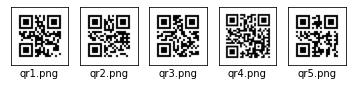

In [51]:
import matplotlib.pyplot as plt
import glob
import cv2

fig = plt.figure()
rows = 1
cols = 5
i = 1
qrfiles = glob.glob("qr*.png")
qrfiles.sort()
for filename in qrfiles:
  img = cv2.imread(filename)
  ax = fig.add_subplot(rows, cols, i)
  ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax.set_xlabel(filename)
  ax.set_xticks([]), ax.set_yticks([])
  i += 1